<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Lisandro Robles

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 + \phi_0).k/f_s),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Para la realizacion de este ejercicio se ha generado un modulo que simula un generador de senales mediante una clase llamada signal_generator.


a) A continuacion se corroborara el funcionamiento

In [1]:
######################################
# Se importan los modulos necesarios #
######################################

#Importa el paquete numérico
import numpy as np

#Importa el paquete que implementa la clase generador de señales
import pdsmodulos.signal_generator as gen



In [2]:
###########################
# Parámetros del muestreo #
###########################

N = 1000    # Cantidad de muestras
fs = 1000   # Frecuencia de muestreo[Hz]


In [3]:
########################################
# Inicializa el generador de señales   #
########################################

#Se instancia la clase "signal_generator"
#El inicializador de la misma recibe los parámetros:
#1)Frecuencia de muestreo
#2)Cantidad de muestras
#En base a estos valores genera parámetros internos como:
#1)Período de muestreo
#2)Vector temporal
#3)Resolución espectral, de forma que a la hora de generar las señales 
#se pueda trabajar de forma normalizada

generador = gen.signal_generator(fs,N)

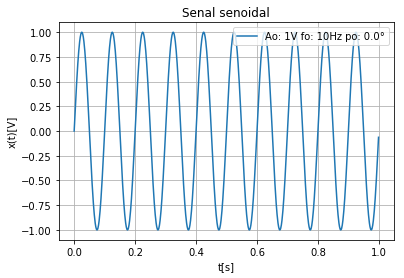

In [4]:
##################
# a.1) Senoidal #
#################

#Se inicializan los parámetros para crear la señal senoidal
a0 = 1      # Volts
p0 = 0      # Radianes
f0 = 10     # Decimo bin (forma normalizada)

#Se llama al método sinewave de la instancia "generador"
(t,x) = generador.sinewave(a0,f0,p0,plot = True)


¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Si. La misma puede inferirse observando que en la ventana de exploración(cuya duración temporal es de $NT_{s}$ segundos) se desarrollan $10$ ciclos de la senoidal.
    
Por lo tanto, se tiene que el período de la senoidal es:

\begin{equation}
T_{o} = \frac{NT_{s}}{10}
\end{equation}

En base a esto, la frecuencia de la senoidal puede calcularse como:

\begin{equation}
f_{o} = \frac{1}{T_{o}} = \frac{10}{NT_{s}} = 10\frac{f_{s}}{N} = 10\frac{1000 [Hz]}{1000} = 10 [Hz] 
\end{equation}

</div>

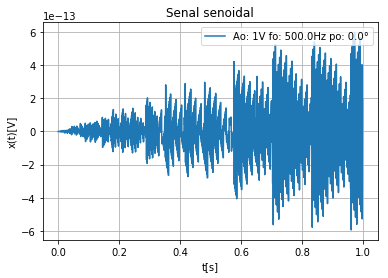

In [5]:
##################
# a.2) Senoidal #
#################

a0 = 1                  # Volts
p0 = 0                  # Radianes
f0 = np.round(N/2)      # Bin 500 (forma normalizada)

(t,x) = generador.sinewave(a0,f0,p0,plot = True)


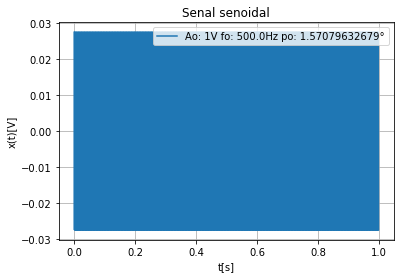

In [6]:
##################
# a.3) Senoidal #
#################

a0 = 1                      # Volts
p0 = np.pi/2                # Radianes
f0 = np.round(N/2)          # Bin 500 (forma normalizada)

(t,x) = generador.sinewave(a0,f0,p0,plot = True)


¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

No, no es posible conocer los parámetros de la senoidal.

</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Las senales analizadas anteriormente tenian una frecuencia de $f_{o} = \frac{N}{2}\frac{f_{s}}{N} = \frac{f_{s}}{2}$. Por lo que su periodo sera:

\begin{equation}
T_{o} = \frac{1}{f_{o}} = \frac{2}{f_{s}} = 2T_{s}
\end{equation}

Siendo que la grilla temporal es de un punto cada $T_{s}$ segundos, se tendra 2 puntos para cada período de la señal, lo cual es muy poca información para poder distinguirlas ya que segun la fase inicial de la senal los resultados cambiarán mucho.

</div>

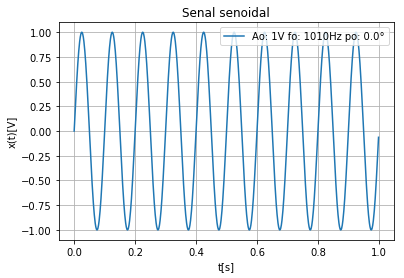

In [7]:
##################
# a.4) Senoidal #
#################

a0 = 1                      # Volts
p0 = 0                      # Radianes
f0 = np.round(N) + 10       # Bin 500 (forma normalizada)

(t,x) = generador.sinewave(a0,f0,p0,plot = True)


¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

No, no es posible discernirlas. Esto fenómeno de ambigüedad implica que al tomar N muestras a una frecuencia de muestreo $f_{s}$, no se podra distinguir una señal $x_{1}(t)$ de frecuencia fundamental $f_{1} = k\Delta_{f}$ de otra señal $x_{2}(t)$ de frecuencia fundamental $f_{2} = k\Delta_{f} + f_{s}$, en donde $\Delta_{f} = \frac{f_{s}}{N}$ y $k \in Z$.

Este fenómeno se debe a la periodicidad del espectro de señal cada $f_{s}$, producto de discretizar en tiempo cada $T_{s}$ segundos.

</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

La solución debe ser implementada en un momento previo a la conversion Analogica-Digital. La misma consiste en utilizar un filtro analógico Anti-alias que elimine las componentes de senal que esten por encima de $\frac{fs}{2}$. Mediante este procedimiento se logra desambiguar. 

</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [8]:
######################################
# Se importan los modulos necesarios #
######################################

#Importa el paquete numérico
import numpy as np

#Importa el paquete de manejo de datos pandas
import pandas as pd
from IPython.display import HTML

#Importa el paquete gráfico
import matplotlib.pyplot as plt

#Importa el paquete para medición de tiempo
import time 

#Importa el paquete que implementa la clase generador de señales
import pdsmodulos.signal_generator as gen

#Importa el paquete que implementa la clase analizador de espectro
import pdsmodulos.spectrum_analyzer as sa


In [31]:
###########################
# Parametros del muestreo #
###########################

#Tamanos de señal para los cuales se harán las simulaciones
N = (16,32,64,128,256,512,1024,2048)

In [43]:
###########################################
# Variables para almacenar los resultados #
###########################################

#Indice de las filas en donde se almacenarán los resultados
indices = ['Tamaño de la señal N']

#Variable en la que se almacenarán los resultados
tus_resultados = [['--','--']]

########################################
# Inicializa el ciclo de prueba        #       
########################################

for Ni in N:

    #############################################################
    # Se setea fs de forma de siempre tener resolución unitaria #
    #############################################################

    fsi = Ni            

    ########################################
    # Inicializo el generador de señal     #
    ########################################

    generador = gen.signal_generator(fsi,Ni)

    ########################################
    # Señal de prueba                      #       
    ########################################

    Ao = 1
    fo = np.round(Ni/6)
    po = 0

    (t,x) = generador.sinewave(Ao,fo,po)

    ########################################
    # Inicializo el analizador de espectro #
    ########################################

    analizador = sa.spectrum_analyzer(fsi,Ni,algorithm = "dft")

    ########################################
    # Calcula la DFT usando la DFT         #       
    ########################################

    startDFT = time.time()
    (X) = analizador.transform(x)
    endDFT = time.time()
    timeDFT = np.around(endDFT - startDFT,decimals = 4)

    ########################################
    # Setea la FFT como algoritmo          #       
    ########################################

    analizador.set_algorithm("fft")

    ########################################
    # Calcula la DFT usando la FFT         #       
    ########################################

    startFFT = time.time()
    (X) = analizador.transform(x)
    endFFT = time.time()
    timeFFT = np.around(endFFT - startFFT,decimals = 4)

    ################################################
    # Almacena los resultados en una lista         #       
    ################################################

    tus_resultados.append([str(timeDFT),str(timeFFT)])
    #tus_resultados.append([timeDFT,timeFFT])

    indices.append(Ni)

In [44]:
############################################
# Ordena los resultados en un frame        #       
############################################

df = pd.DataFrame(tus_resultados, columns = ['tiempo transcurrido DFT (s)','tiempo transcurrido FFT (s)'], index = indices)

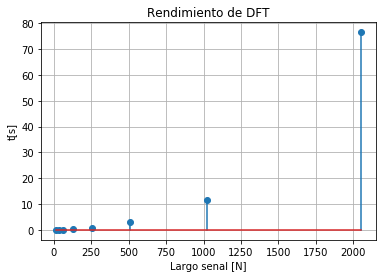

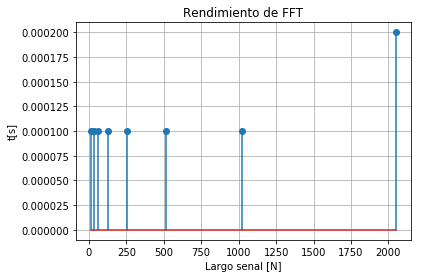

In [45]:
#################################################
# Grafica los resultados en funcion de N        #       
#################################################

#Para la DFT

tiemposDFT = [float(i[0]) for i in tus_resultados if i[0] != '--']

plt.figure()
plt.stem(N,tiemposDFT)
plt.title('Rendimiento de DFT')
plt.axis('tight')
plt.xlabel('Largo senal [N]')
plt.ylabel('t[s]')
plt.grid()

#Para la FFT

tiemposFFT = [float(i[1]) for i in tus_resultados if i[1] != '--']

plt.figure()
plt.stem(N,tiemposFFT)
plt.title('Rendimiento de FFT')
plt.axis('tight')
plt.xlabel('Largo senal [N]')
plt.ylabel('t[s]')
plt.grid()

In [46]:
###############################################
# Se grafica una tabla con los resultados     #       
###############################################
HTML(df.to_html())


,tiempo transcurrido DFT (s),tiempo transcurrido FFT (s)
Tamaño de la señal N,--,--
16,0.004,0.0001
32,0.0137,0.0001
64,0.0491,0.0001
128,0.1881,0.0001
256,0.7103,0.0001
512,2.8849,0.0001
1024,11.404,0.0001
2048,76.4882,0.0002


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

In [111]:
######################################
# Se importan los modulos necesarios #
######################################

#Importa el paquete numérico
import numpy as np

#Importa el paquete gráfico
import matplotlib.pyplot as plt

#Importa el paquete de manejo de datos
import pandas as pd
from IPython.display import HTML

#Importa el paquete que implementa la clase generador de señales
import pdsmodulos.signal_generator as gen

#Importa el paquete que implementa la clase analizador de espectro
import pdsmodulos.spectrum_analyzer as sa

In [112]:
###########################
# Parametros del muestreo #
###########################

N = 1024    # Muestras
fs = 1024   # Hz


In [113]:
########################################
# Inicializo el generador de señales   #
########################################

generador = gen.signal_generator(fs,N)

In [114]:
########################################
# Inicializo el analizador de espectro #
########################################

analizador = sa.spectrum_analyzer(fs,N,algorithm = "fft")

In [115]:
########################################
# Genera señal patrón                  #
########################################

a0 = np.sqrt(2)         # Volts
p0 = 0                  # Radianes
fn = int(np.round(N/4)) # Bin N/4 (forma normalizada)

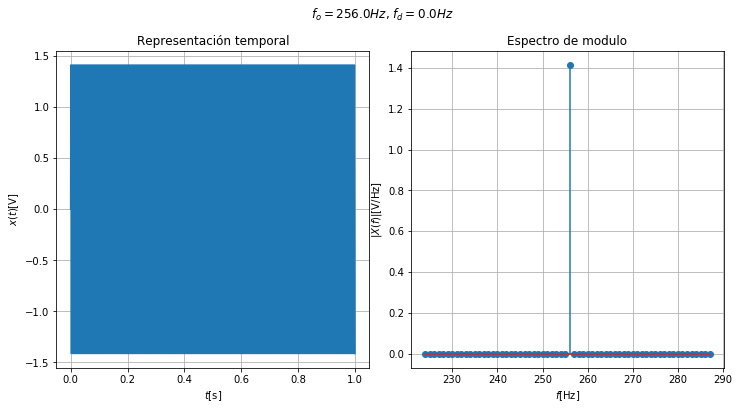

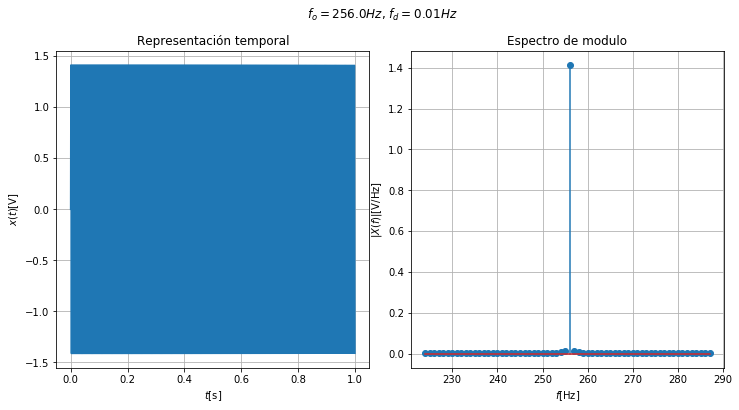

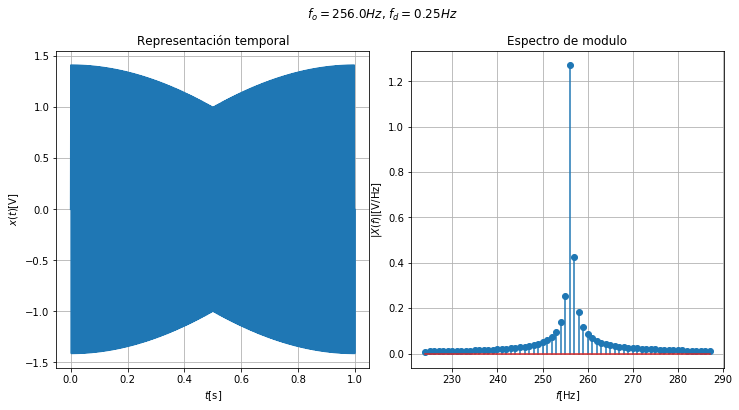

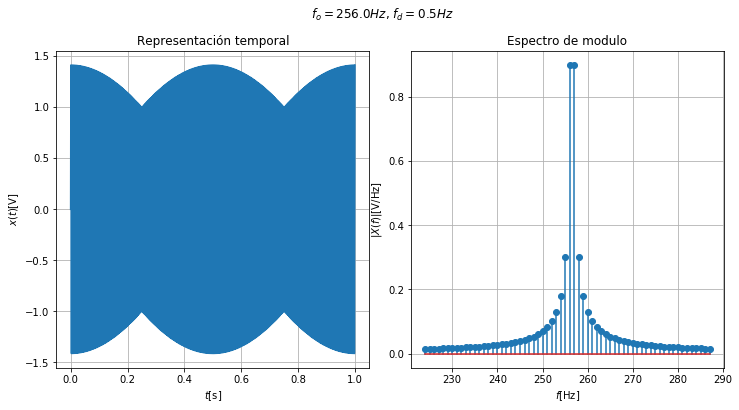

In [119]:
##################
# a) Leakege     #
##################

fd = (0,0.01,0.25,0.5)  # Frecuencias de desintonía

tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert$', '$\sigma^2_{x(t)}$','$\sum_{i=F} \lvert X(f_i) \lvert^2$'], 
           ['',                        '',                           '$F:f \neq f_0$','                    ','                ']]

cantidad = np.size(fd,0)
    
for fd_actual in fd:

    resto_frecuencias = 0

    f0 = fn + fd_actual

    (t,x) = generador.sinewave(a0,f0,p0)
    (f,X_mod) = analizador.module(x)

    var = np.around(np.var(x),decimals = 2)
                  
    fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
    fig.suptitle('$f_{o} = ' + str(fn*(fs/N)) + ' Hz$, ' + '$f_{d} = ' + str(fd_actual*(fs/N)) + 'Hz$', fontsize=12,y = 1.08)
    fig.tight_layout()

    axarr[0].plot(t,x)
    axarr[0].set_title('Representación temporal')
    axarr[0].set_ylabel('$x(t)$[V]')
    axarr[0].set_xlabel('$t$[s]')
    axarr[0].axis('tight')
    axarr[0].grid()
    axarr[1].stem(f[(fn - int(N/32)):(fn + int(N/32))],X_mod[(fn - int(N/32)):(fn + int(N/32))])
    axarr[1].set_title('Espectro de modulo')
    axarr[1].set_ylabel('$|X(f)|$[V/Hz]')
    axarr[1].set_xlabel('$f$[Hz]')
    axarr[1].axis('tight')
    axarr[1].grid()
    
    plt.show()
        
    frec_central = 2*X_mod[fn] if (fn != 0 and fn != N/2) else X_mod[fn] 
    primer_adyacente = 2*X_mod[fn+1] if ((fn + 1) != 0 and (fn + 1) != N/2) else X_mod[fn + 1]
    resto_frecuencias = 0
    pars = 0
    
    for i in range(0,np.size(X_mod,0)):
        
        Xi = X_mod[i]
        
        if i != fn and i != (fn + N/2):
            resto_frecuencias = resto_frecuencias + Xi

        if i != 0 and i != N/2:
            pars = pars + 2*np.power((Xi/2),2)
        else:
            pars = pars + np.power(Xi,2)

    pars = np.around(pars,decimals = 2)
            
    tus_resultados.append([str(frec_central),str(primer_adyacente),str(resto_frecuencias),str(var),str(pars)])

df = pd.DataFrame(tus_resultados)



In [56]:
HTML(df.to_html())


,0,1,2,3,4
0,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert$,$\sigma^2_{x(t)}$,$\sum_{i=F} \lvert X(f_i) \lvert^2$
1,,,$F:f \neq f_0$,,
2,[ 2.82842712],[ 2.88669472e-14],[ 9.30605594e-13],1.0,[ 1.]
3,[ 2.82795645],[ 0.02857089],[ 0.17995979],1.0,[ 1.]
4,[ 2.54452622],[ 0.85078025],[ 3.98237026],1.0,[ 1.]
5,[ 1.80062698],[ 1.80064393],[ 6.07736079],1.0,[ 1.]


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$. 
</div>

In [126]:
########################################
# Inicializo el generador de señales   #
########################################

generador = gen.signal_generator(fs,N)

In [127]:
########################################
# Inicializo el analizador de espectro #
########################################

analizador = sa.spectrum_analyzer(fs,N,algorithm = "fft")

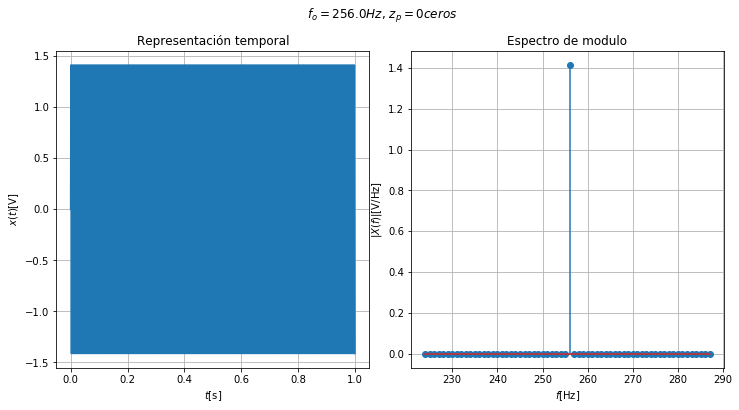

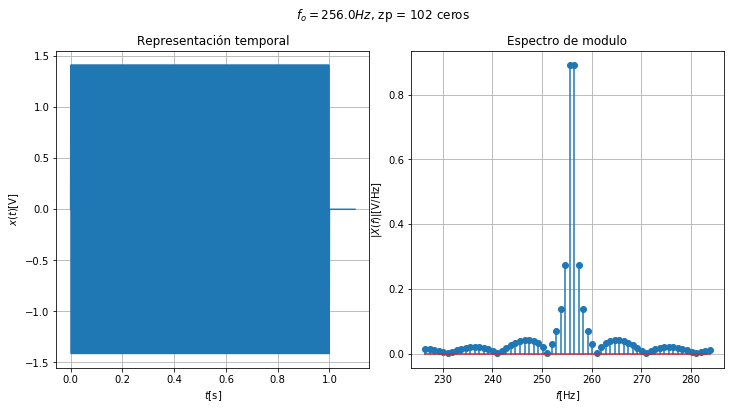

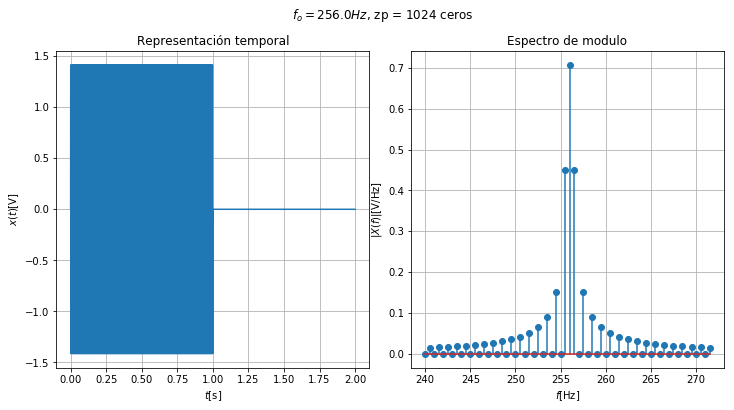

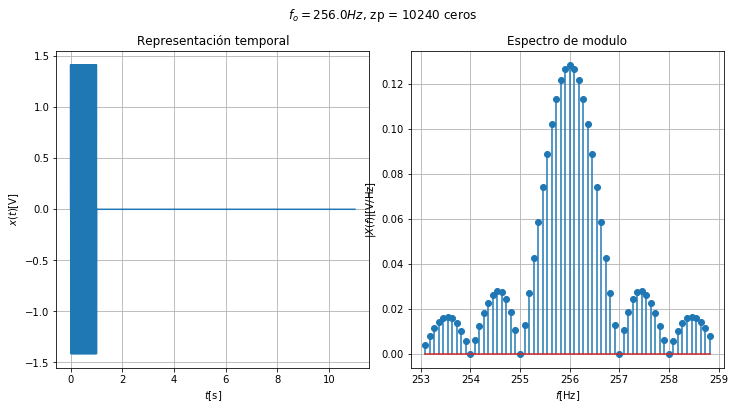

In [129]:
#######################
# b) Zero padding     #
#######################

Mj = (int(np.round(N/10)),int(np.round(N)),int(np.round(10*N)))

(t,x) = generador.sinewave(a0,fn,p0)
(f,X_mod) = analizador.module(x)

fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('$f_{o} = ' + str(fn*(fs/N)) + ' Hz$, ' + '$z_{p} = ' + str(0) + 'ceros$', fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t,x)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[(fn - int(N/32)):(fn + int(N/32))],X_mod[(fn - int(N/32)):(fn + int(N/32))])
axarr[1].set_title('Espectro de modulo')
axarr[1].set_ylabel('$|X(f)|$[V/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

for Mi in Mj:

    (t,xi) = generador.zero_padding(x,Mi)
    Ni = generador.N + Mi            
    analizador.set_points(Ni)
    (f,Xi_mod) = analizador.module(xi)
    
    fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
    fig.suptitle('$f_{o} = ' + str(fn*(fs/N)) + ' Hz$, ' + 'zp = $' + str(Mi) + '$ ceros', fontsize=12,y = 1.08)
    fig.tight_layout()

    axarr[0].plot(t,xi)
    axarr[0].set_title('Representación temporal')
    axarr[0].set_ylabel('$x(t)$[V]')
    axarr[0].set_xlabel('$t$[s]')
    axarr[0].axis('tight')
    axarr[0].grid()
    axarr[1].stem(f[(int((fn*(fs/N))/(fs/Ni)) - int(N/32)):(int((fn*(fs/N))/(fs/Ni)) + int(N/32))],Xi_mod[(int((fn*(fs/N))/(fs/Ni)) - int(N/32)):(int((fn*(fs/N))/(fs/Ni)) + int(N/32))])
    axarr[1].set_title('Espectro de modulo')
    axarr[1].set_ylabel('$|X(f)|$[V/Hz]')
    axarr[1].set_xlabel('$f$[Hz]')
    axarr[1].axis('tight')
    axarr[1].grid()

    plt.show()
    
analizador.set_points(generador.N)


**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Si, la misma se ha reducido. Al hacer más grande la cantidad de muestras $N$, la expresión $\Delta_{f} = \frac{f_{s}}{N}$ se hace más pequeña. 

</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b>

Al agregar ceros al final de la señal se reduce la resolución espectral tal como se ha mencionado anteriormente. Pero más allá de esto último, el largo de la ventana rectangular multiplicando a la señal senoidal se mantiene constante, lo cuál hace que al aumentar $N$ los bins de la FFT empiezen a coincidir con valores no nulos del Kernel de Dirichlet.
El resultado de este fenómeno hace que el espectro de modulo se empieze a parecer a la Transformada de Fourier continua de una senoidal aperiódica, la cual tendrá la forma del Kernel de Dirichlet centrado en la frecuencia $f_{o}$ de la senoidal.
En particular, si se pudiera hacer que $N\to\infty$, se tendria una señal totalmente aperiodica y un espectro continuo.

</div>

<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-success">
<b>Predicción:</b> 

Se predice un delta de Kronecker de energía unitaria localizado en $f_{o} = 9*\Delta_{f} = 9 Hz$. Esta predicción se explica considerando a la señal $x_{1}(t)$ en cuestión como al producto entre una senoidal y una ventana rectangular de $\frac{N}{f_{s}}$ segundos de duración.

Esto equivale a una convolución en el dominio de la frecuencia entre el espectro de una senoidal periódica (delta de Kroenecker) y el espectro de la ventana rectangular (Kernel de Dirichlet). Esta operación da como resultado la traslación del Kernel de Dirichlet centrandolo el $f_{o} = 9*\Delta_{f} = 9$ Hz. La forma del Kernel de Dirichlet es bastante similar a una $sinc(x) = \frac{sin(x)}{x}$ con ceros en $f_{z} = f_{o} + k\frac{f_{s}}{N}$ con $k \in Z - {{0}}$, lo cual explica el espectro resultante ya que todos estos ceros coinciden con los bines de la FFT que son excepto en $ f = f_{o} $ en donde el Kernel tiene su valor máximo.

</div>

In [85]:
######################################
# Se importan los modulos necesarios #
######################################

#Importa el paquete numérico
import numpy as np

#Importa el paquete de manejo de datos pandas
import pandas as pd
from IPython.display import HTML

#Importa el paquete gráfico
import matplotlib.pyplot as plt

#Importa el paquete que implementa la clase generador de señales
import pdsmodulos.signal_generator as gen

#Importa el paquete que implementa la clase analizador de espectro
import pdsmodulos.spectrum_analyzer as sa

In [86]:
#############################
# Parametros del generador  #
#############################

N = np.power(2,10)       # Muestras
fs = np.power(2,10)      # Hz

########################################
# Inicializo el generador de funciones #
########################################

generador = gen.signal_generator(fs,N)

########################################
# Inicializo el analizador de espectro #
########################################

analizador = sa.spectrum_analyzer(fs,N,"fft")

In [87]:
########################################
# Genero las senoidales patrones       #
########################################    

Ao = np.sqrt(2) #Para que sea de energía normalizada
po = 0 #Fase
fn1 = 9 #Frecuencia normalizada, noveno bin
fn2 = 8 #Frecuencia normalizada, octavo bin

#Senoidal patron de 9*(fs/N)
(t,x1) = generador.sinewave(Ao,fn1,po)

#Senoidal patron de 8*(fs/N)
(t,x2) = generador.sinewave(Ao,fn2,po)

#Frecuencia absoluta y periodo de la senoidal de 9*(fs/N)
fo1 = (fn1*(fs/N))
To1 = 1/fo1

#Frecuencia absoluta y periodo de la senoidal de 8*(fs/N)
fo2 = (fn2*(fs/N))
To2 = 1/fo2

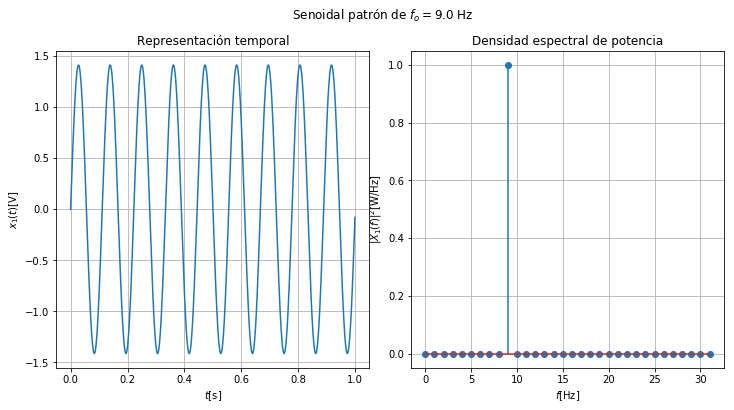

In [88]:
################################################
# Experimento para senoidal patrón de 9*(fs/N) #
################################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$']]

#####################
# Predicción        #
#####################

tus_resultados.append(['','',''])

#Se predice: 
#1)Energía unitaria.
#2)Toda la energía estara concentrada en fo = 9*(fs/N), por lo tanto X1(fo) = 1
#3)Debido a 2) el maximo contenido de energía se concentrara en fo = 9*(fs/N)
tus_resultados.append([str(1),str(1),str(fo1)])

#####################
# Simulación        #
#####################

#Se obtiene la densidad espectral de potencia
(f,X1) = analizador.PSD(x1)

#Obtencion analitica de resultados
tus_resultados.append(['','',''])
tus_resultados.append([str(np.sum(X1)),str(X1[fn1]),str((fs/N)*np.argmax(X1))])

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Senoidal patrón de $f_{o} = ' + str(fo1) + '$ Hz', fontsize=12,y = 1.08)
#fig.subplots_adjust(left=0.25, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
#fig.subplots_adjust()
fig.tight_layout()

axarr[0].plot(t, x1)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x_{1}(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[0:int(N/32)],X1[0:int(N/32)])
axarr[1].set_title('Densidad espectral de potencia')
axarr[1].set_ylabel('$|X_{1}(f)|^2$[W/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

In [89]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1,1,9.0
,,,
simulación,1.0,[ 1.],9.0


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Los resultados de la simulación han validado las hipótesis de la predicción.
    
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-success">
<b>Predicción:</b> 

Se predice un espectro de forma similar a una $sinc(x)$ de $ E_{total} = (\frac{1}{9})$, centrada en $f_{o} = 9*\Delta_{f} = 9 Hz$ y con un valor máximo $ |X_{3}(f_{o})|^2 = (\frac{1}{9})^2$ ya que la FFT, que es en esencia una sumatoria, se hará sobre $(\frac{1}{9})$ de los puntos anteriores. 

La energía total de la señal se explica teniendo en cuenta que la FFT considera que $x_{3}(t)$ es periódica cada $NT_{s}$ segundos. A diferencia del caso anterior, el área cuadrática de la señal será $9$ veces menor ya que se tiene un solo período en vez de $9$. 

El desparramo de energía se explica considerando a la señal $x_{3}(t)$ en cuestión como al producto entre una senoidal y una ventana rectangular de $(\frac{N}{9 f_{s}})$ segundos de duración.
Esto equivale a una convolución en el dominio de la frecuencia entre el espectro de una senoidal periódica (delta de Kroenecker) y el espectro de la ventana rectangular (Kernel de Dirichlet). Esta operación da como resultado la heterodinación del Kernel de Dirichlet centrandolo el $f_{o} = 9*\Delta_{f} = 9$ Hz. La forma del Kernel de Dirichlet es bastante similar a una $sinc(x) = (\frac{sin(x)}{x})$ con ceros en $f_{z} = f_{o} + k(\frac{9 f_{s}}{N})$ con $k \in Z - {{0}}$, lo cual explica el desparramo ya que la resolución espectrla $\Delta_{f} = (\frac{f_{s}}{N})$ será menor al largo de los lobulos.


</div>

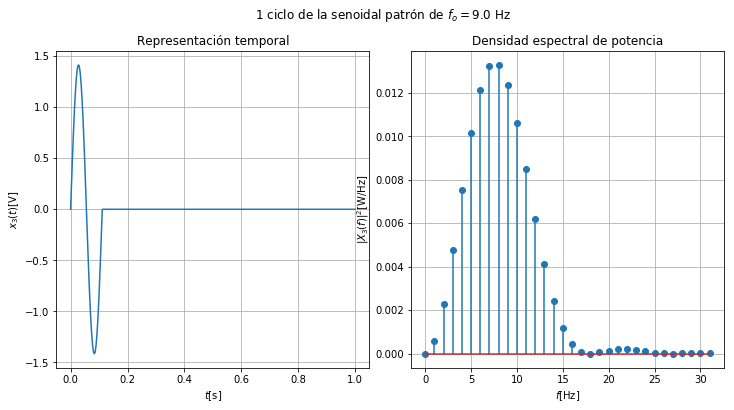

In [90]:
############################################################
# Experimento para 1 solo ciclo de senoidal patrón de 9*df #
############################################################

#Genero la senoidal en cuestión
cond = (t < To1).reshape(N,1)
x3 = x1*cond

#Tabla en la que se almacenran los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$']]

#####################
# Predicción        #
#####################

tus_resultados.append(['','',''])

#Se predice: 
#1)Energía igual a 1/9 ya que en vez de 9 ciclos se tiene solo 1, por lo que el área será 9
#veces más chica.
#2)La energía en fo sera algo más chica que 1/9 ya que habrá energía desparramada alrededor
#producto de que el resultado espectral sera un Kernel de Dirichlet con ceros cada 9*(fs/N)
#que coincidira con los bins del espectro.
#3)Debido a 2) el maximo contenido de energía se concentrara en fo = 9*(fs/N) pero será algo
#más chico que 1/9
tus_resultados.append([str(1/9),str(np.power((1/9),2)),str(fo1)])

#####################
# Simulación        #
#####################

(f,X3) = analizador.PSD(x3)

#Obtencion analítica de resultados
tus_resultados.append(['','',''])
tus_resultados.append([str(np.sum(X3)),str(X3[fn1]),str((fs/N)*np.argmax(X3))])

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('1 ciclo de la senoidal patrón de $f_{o} = ' + str(fo1) + '$ Hz', fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t, x3)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x_{3}(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[0:int(N/32)],X3[0:int(N/32)])
axarr[1].set_title('Densidad espectral de potencia')
axarr[1].set_ylabel('$|X_{3}(f)|^2$[W/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

In [91]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.1111111111111111,0.0123456790123,9.0
,,,
simulación,0.111111206463,[ 0.0123457],8.0


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Se han verificado las hipótesis respecto a la $E_{total}$, el desparramo de la misma y el valor del espectro en $|X_{3}(f_{o})|$.

Ha habido una incronguencia respecto a la componente de mayor energía. La misma se predijo que estaria en $f_{o} = 9*\Delta_{f} = 9 Hz$ mientras que la simulación ha arrojado que la misma se encuentra en $f_{o}' = 8*\Delta_{f} = 8 Hz$.
Para explicar esta inconguencia se propone la hipótesis de que esta se debe al alias producido por el lobulo secundario de la componente simétrica de $-9 Hz$, la cual influye mucho debido a que $f_{o}$ es muy cercana a cero.

</div>

<div class="alert alert-block alert-success">
<b>Predicción:</b> 

Se predicen los mismos resultados ya que el retraso no afecta al modulo. La única diferencia se vera en la fase, ya que un retraso temporal $x_{3}'(t) = x_{3}(t - t_{o})$ se traduce en el dominio de la frecuencia como un desfasaje de forma que $\phi_{x3'(t)} = \phi_{x3(t)} - 2\pi f_{o} t_{o}$.

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

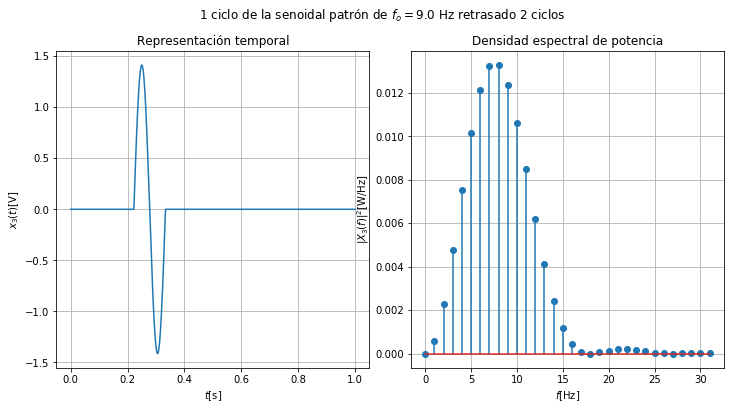

In [92]:
####################################################################################
# Experimento para 1 solo ciclo de senoidal patrón de 9*(fs/N) demorado dos ciclos #
####################################################################################

#Genero la senoidal en cuestión
cond1 = (t >= 2*To1).reshape(N,1)
cond2 = (t <= 3*To1).reshape(N,1)
cond = cond1*cond2

x3 = x1*cond

#Tabla en la que se almacenran los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$']]

#####################
# Predicción        #
#####################

tus_resultados.append(['','',''])
tus_resultados.append([str(1/9),str(np.power((1/9),2)),str(fo1)])

#####################
# Simulación        #
#####################

(f,X3) = analizador.PSD(x3)

#Obtencion analítica de resultados
tus_resultados.append(['','',''])
tus_resultados.append([str(np.sum(X3)),str(X3[fn1]),str((fs/N)*np.argmax(X3))])

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('1 ciclo de la senoidal patrón de $f_{o} = ' + str(fo1) + '$ Hz retrasado 2 ciclos', fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t, x3)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x_{3}(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[0:int(N/32)],X3[0:int(N/32)])
axarr[1].set_title('Densidad espectral de potencia')
axarr[1].set_ylabel('$|X_{3}(f)|^2$[W/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

In [93]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.1111111111111111,0.0123456790123,9.0
,,,
simulación,0.111111010307,[ 0.01234566],8.0


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Se observa que se han verificado los hipótesis de la predicción y que no se ha modificado el espectro de módulo.

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-success">
<b>Predicción:</b> 

Se predice el solopamiento de dos espectros de forma similar a una $sinc(x)$, uno debido a la señal $x_{1}(t)$ de $f_{o1} = 9(\frac{f_{s}}{N}) = 9 Hz $ y otro debido a la señal $x_{2}(t)$ de $f_{o2} = 8(\frac{f_{s}}{N}) = 8 Hz $ . La energía total sera el resultado de la suma de las energias de ambas señales $\frac{1}{9} + \frac{1}{8} = \frac{17}{72} = 0.236  $. Se esperan dos máximos de energía en $f_{o1} = 9 Hz$ y en $f_{o2} = 8 Hz$ con valor igual a $|X_{3}(f_{o1})| = (\frac{1}{9})^2$ y $|X_{3}(f_{o2})| = (\frac{1}{8})^2$ .
Tambien se espera que el desparramo de energía alrededor de estos máximos sea el resultado de la sumatoria de ambos espectros, por los que se espera que sea fuertemente dependiente de la fase.

</div>

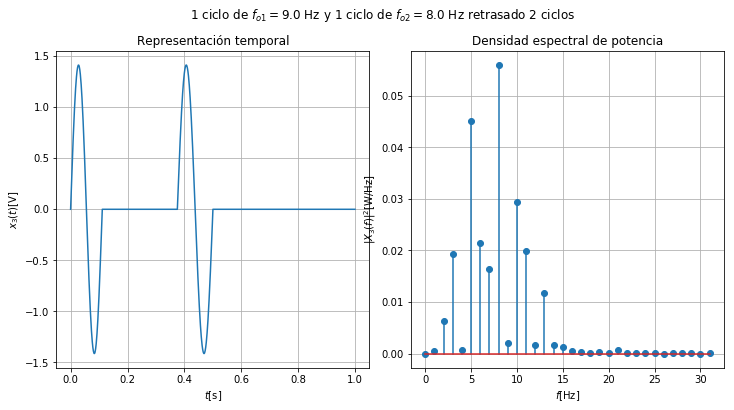

In [94]:
####################################################################################
# Experimento para 1 solo ciclo de senoidal patrón de 9*(fs/N) y 1 solo ciclo de   #
# de senoidal patrón de  8*(fs/N) demorado aproximadamente 2 ciclos                #
####################################################################################

#Genero la señal en cuestión
cond = (t <= To1).reshape(N,1)

x1aux = x1*cond

cond1 = (t >= 3*To2).reshape(N,1)
cond2 = (t <= 4*To2).reshape(N,1)
cond = cond1*cond2

x2aux = x2*cond

x3 = x1aux + x2aux

#Tabla en la que se almacenran los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_{o1}) \rvert ^2 $', '$ \lvert X(f_{o2}) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',' $f_{o1} = 9 Hz$                                    ','    $f_{o2} = 9 Hz$                          ','$f \in [0:f_S/2]$']]

#####################
# Predicción        #
#####################

tus_resultados.append(['','','',''])
tus_resultados.append([str((1/9) + (1/8)),str(np.power((1/9),2)),str(np.power((1/8),2)),str(fo1) + ', ' + str(fo2)])

#####################
# Simulación        #
#####################

(f,X3) = analizador.PSD(x3)

#Obtencion analítica de resultados
tus_resultados.append(['','','',''])
tus_resultados.append([str(np.sum(X3)),str(X3[fn1]),str(X3[fn2]),str((fs/N)*np.argmax(X3))])

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('1 ciclo de $f_{o1} = ' + str(fo1) + '$ Hz y 1 ciclo de $f_{o2} = ' + str(fo2) + '$ Hz retrasado 2 ciclos', fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t, x3)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x_{3}(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[0:int(N/32)],X3[0:int(N/32)])
axarr[1].set_title('Densidad espectral de potencia')
axarr[1].set_ylabel('$|X_{3}(f)|^2$[W/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

In [95]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_{o1}$','Energía en $f_{o2}$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_{o1}$,Energía en $f_{o2}$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_{o1}) \rvert ^2 $,$ \lvert X(f_{o2}) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,$f_{o1} = 9 Hz$ ...,$f_{o2} = 9 Hz$,$f \in [0:f_S/2]$
,,,,
predicción,0.2361111111111111,0.0123456790123,0.015625,"9.0, 8.0"
,,,,
simulación,0.236111206463,[ 0.00195279],[ 0.0559923],8.0


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Se observa que se ha verificado la energía total pero hay una incongruencia respecto a los máximos predichos. Los mismos se han ubicado en $5 Hz$ y $8 Hz$, en vez de $8 Hz$ y $9 Hz$ respectivamente. Tambien se ve que los valores en $|X_{3}(f_{o1})|$ y $|X_{3}(f_{o2})|$ no coinciden con los valores predichos, seguramente producto de la sumatoria algebraica entre ambos espectros, en donde influyen las fases $\phi_{X_{1}(f)}$ y $\phi_{X_{2}(f)}$.
Un detalle particular es que el valor en $f_{o2} = 8 Hz$ es $|X_{3}(f_{o2})|^2 = (\frac{1}{9})^2 + (\frac{1}{8})^2$.
Por lo ultimo, se concluye que no pueden localizarse ambos componentes en el espectro.

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-success">
<b>Predicción:</b> 

Se predice la misma energia total respecto al caso anterior pero una distinta distribucion energética ya que la fase de las señales individuales influirá en la sumatoria de los espectros. Se esperan dos máximos de energía en $f_{o1} = 9 Hz$ y $f_{o2} = 8 Hz$ con valores $|X_{3}(f_{o1})| = (\frac{1}{9})^2$ y $|X_{3}(f_{o2})| = (\frac{1}{8})^2$ aunque seguramente al igual que en el experimento anterior no se obtengan estos valores producto de el desparramo energético en los espectros individuales y de su sumatoria algebraica.

</div>

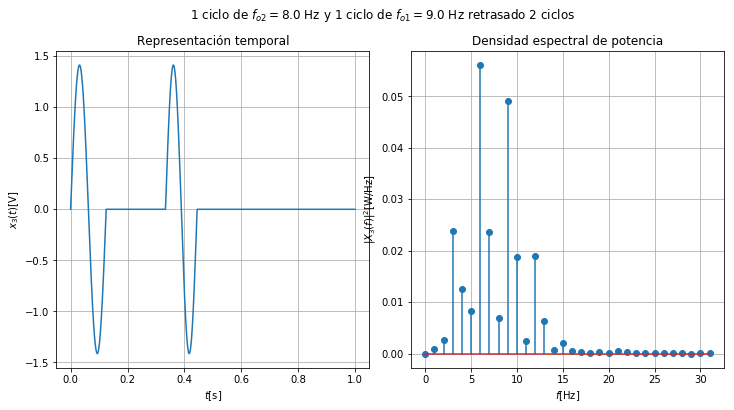

In [96]:
####################################################################################
# Experimento para 1 solo ciclo de senoidal patrón de 8*(fs/N) y 1 solo ciclo de   #
# de senoidal patrón de  9*(fs/N) demorado aproximadamente 2 ciclos                #
####################################################################################

#Genero la señal en cuestión
cond = (t <= To2).reshape(N,1)

x2aux = x2*cond

cond1 = (t >= 3*To1).reshape(N,1)
cond2 = (t <= 4*To1).reshape(N,1)
cond = cond1*cond2

x1aux = x1*cond

x3 = x1aux + x2aux

#Tabla en la que se almacenran los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_{o1}) \rvert ^2 $', '$ \lvert X(f_{o2}) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',' $f_{o1} = 9 Hz$                                    ','    $f_{o2} = 8 Hz$                          ','$f \in [0:f_S/2]$']]

#####################
# Predicción        #
#####################

tus_resultados.append(['','','',''])
tus_resultados.append([str((1/9) + (1/8)),str(np.power((1/9),2)),str(np.power((1/8),2)),str(fo1) + ', ' + str(fo2)])

#####################
# Simulación        #
#####################

(f,X3) = analizador.PSD(x3)

#Obtencion analítica de resultados
tus_resultados.append(['','','',''])
tus_resultados.append([str(np.sum(X3)),str(X3[fn1]),str(X3[fn2]),str((fs/N)*np.argmax(X3))])

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('1 ciclo de $f_{o2} = ' + str(fo2) + '$ Hz y 1 ciclo de $f_{o1} = ' + str(fo1) + '$ Hz retrasado 2 ciclos', fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t, x3)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x_{3}(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[0:int(N/32)],X3[0:int(N/32)])
axarr[1].set_title('Densidad espectral de potencia')
axarr[1].set_ylabel('$|X_{3}(f)|^2$[W/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

In [97]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_{o1}$','Energía en $f_{o2}$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_{o1}$,Energía en $f_{o2}$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_{o1}) \rvert ^2 $,$ \lvert X(f_{o2}) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,$f_{o1} = 9 Hz$ ...,$f_{o2} = 8 Hz$,$f \in [0:f_S/2]$
,,,,
predicción,0.2361111111111111,0.0123456790123,0.015625,"9.0, 8.0"
,,,,
simulación,0.236111108392,[ 0.04902926],[ 0.00683577],6.0


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Se observa que se ha verificado la energía total pero hay una incongruencia respecto a los máximos predichos. Los mismos se han ubicado en $6 Hz$ y $9 Hz$, en vez de $8 Hz$ y $9 Hz$ respectivamente. Tambien se observa que los valores en $|X_{3}(f_{o1})|$ y $|X_{3}(f_{o2})|$ no coinciden con los valores predichos, seguramente producto de la sumatoria algebraica entre ambos espectros, en donde influyen las fases $\phi_{X_{1}(f)}$ y $\phi_{X_{2}(f)}$.
En particular, observamos que a diferencia del experimento anterior el valor energetico de $f_{o1} = 9 Hz$ es $|X_{3}(f_{o1})|^2 \approx (\frac{1}{9})^2 + (\frac{1}{8})^2$. Entonces podemos concluir que si bien no es sencillo distinguir dos componentes, se puede decir cual ha ocurrido antes si ya se conoce esas componentes.

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-success">
<b>Predicción:</b> 

Se predice un espectro de forma similar a una $sinc(x)$ de energía total $(\frac{1}{3})$ centrada en $f_{o} = 9\Delta_{f} = 9 Hz$ con un valor máximo $ |X_{3}(f_{o})|^2 = (\frac{1}{3})^2$ ya que la FFT, que es en esencia una sumatoria, se hará sobre $(\frac{1}{3})$ de los puntos anteriores. 

La energía total de la señal se explica teniendo en cuenta que la FFT considera que $x_{3}(t)$ es periódica cada $NT_{s}$ segundos. A diferencia del caso anterior, el área cuadrática de la señal será $3$ veces menor ya que se tiene $3$ períodos en vez de $9$. Por otra parte, la energía será $3$ veces mayor que el caso de la senoidal que solo tenia un período. 

El desparramo de energía se explica considerando a la señal $x_{3}(t)$ en cuestión como al producto entre una senoidal y una ventana rectangular de $\frac{N}{3 f_{s}}$ segundos de duración.
Esto equivale a una convolución en el dominio de la frecuencia entre el espectro de una senoidal periódica (delta de Kroenecker) y el espectro de la ventana rectangular (Kernel de Dirichlet). Esta operación da como resultado la heterodinación del Kernel de Dirichlet centrandolo el $f_{o} = 9*\Delta_{f} = 9$ Hz. La forma del Kernel de Dirichlet es bastante similar a una $sinc(x) = \frac{sin(x)}{x}$ con ceros en $f_{z} = f_{o} + k\frac{3 f_{s}}{N}$ con $k \in Z - {{0}}$, lo cual explica el desparramo ya que la resolución espectrla $\Delta_{f} = \frac{f_{s}}{N}$ será menor al largo de los lobulos.


</div>

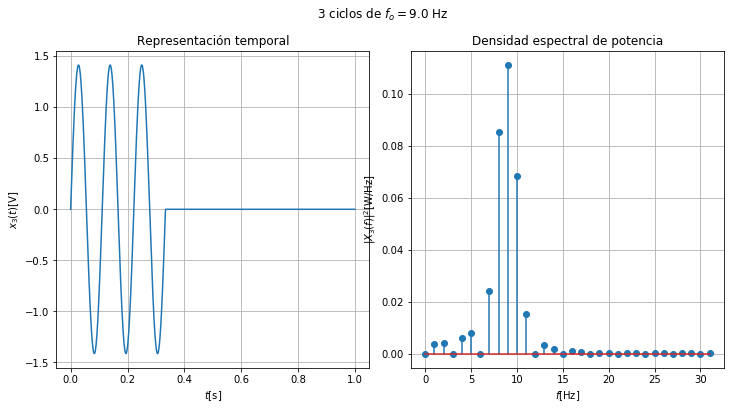

In [99]:
#################################################################
# Experimento para 3 ciclos de senoidal patrón de 9*(fs/N)      #
#################################################################

#Genero la señal en cuestión
cond = (t <= 3*To1).reshape(N,1)  
x3 = x1*cond

#Tabla en la que se almacenran los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$']]

#####################
# Predicción        #
#####################

tus_resultados.append(['','',''])
tus_resultados.append([str(3/9),str(np.power((3/9),2)),str(fo1)])

#####################
# Simulación        #
#####################

(f,X3) = analizador.PSD(x3)

#Obtencion analítica de resultados
tus_resultados.append(['','',''])
tus_resultados.append([str(np.sum(X3)),str(X3[fn1]),str((fs/N)*np.argmax(X3))])

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('3 ciclos de $f_{o} = ' + str(fo1) + '$ Hz', fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t, x3)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x_{3}(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[0:int(N/32)],X3[0:int(N/32)])
axarr[1].set_title('Densidad espectral de potencia')
axarr[1].set_ylabel('$|X_{3}(f)|^2$[W/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

In [100]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.3333333333333333,0.111111111111,9.0
,,,
simulación,0.333333259774,[ 0.11111106],9.0


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Se han verificado las hipótesis respecto a la $E_{total}$, el desparramo de la misma, la ubicación del máximo de energía $f_{o}$ y su valor $|X_{3}(f_{o})|$.

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Idem anterior, pero cada ciclo con diferente amplitud.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-success">
<b>Predicción:</b> 

Se predice un espectro de forma similar a una $sinc(x)$ de energía total $E_{total} =   (\frac{1}{9 x (4)^2}) + (\frac{1}{9 x 1}) + (\frac{1}{9 x (8)^2}) = 0.12 $ centrada en $f_{o} = 9\Delta_{f} = 9 Hz$ con un valor máximo igual a $|X_{3}(f_{o})| = ((\frac{1}{9}) + (\frac{1}{9 x 4}) + (\frac{1}{9 x 8}))^2 = 0.023 $

La energía total de la señal se explica teniendo en cuenta que la FFT considera que $x_{3}(t)$ es periódica cada $NT_{s}$ segundos. A diferencia del caso anterior, el área cuadrática de la señal será igual a un periodo de amplitud normalizada $A_{1} = 1$ por lo que aportará $(\frac{A_{1}^2}{9})$, otro de amplitud normalizada $A_{2} = 0.25$ por lo que aportará $(\frac{A_{2}^2}{9})$ y otro de amplitud normalizada $A_{3} = 0.125$ que aportará $(\frac{A_{3}^2}{9})$.

El desparramo de energía se explica considerando a la señal $x_{3}(t)$ en cuestión como al producto entre una senoidal y una ventana rectangular de $\frac{N}{3 f_{s}}$ segundos de duración.
Esto equivale a una convolución en el dominio de la frecuencia entre el espectro de una senoidal periódica (delta de Kroenecker) y el espectro de la ventana rectangular (Kernel de Dirichlet). Esta operación da como resultado la heterodinación del Kernel de Dirichlet centrandolo el $f_{o} = 9*\Delta_{f} = 9$ Hz. La forma del Kernel de Dirichlet es bastante similar a una $sinc(x) = \frac{sin(x)}{x}$ con ceros en $f_{z} = f_{o} + k\frac{3 f_{s}}{N}$ con $k \in Z - {{0}}$, lo cual explica el desparramo ya que la resolución espectrla $\Delta_{f} = \frac{f_{s}}{N}$ será menor al largo de los lobulos.


</div>

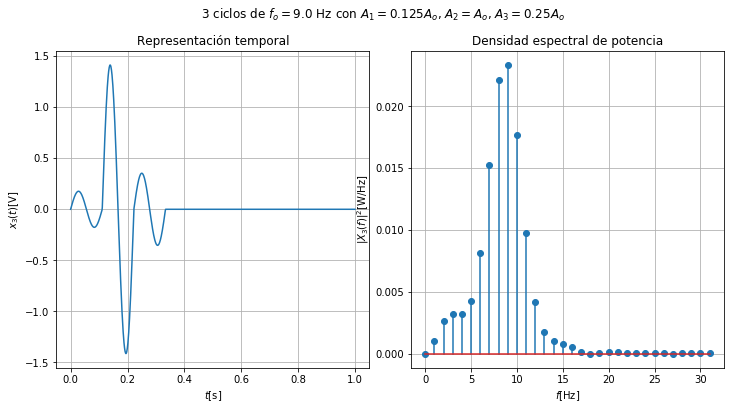

In [101]:
#################################################################
# Experimento para 3 ciclos de senoidal patrón de 9*(fs/N)      #
#################################################################

#Genero la señal en cuestión
A1 = 0.125
A2 = 1
A3 = 0.25

cond1 = (t < To1).reshape(N,1)
cond2 = ((t < 2*To1).reshape(N,1))*((t >= To1).reshape(N,1))
cond3 = ((t <= 3*To1).reshape(N,1))*((t >= 2*To1).reshape(N,1))
        
x3 = (A1*x1*cond1) + (A2*x1*cond2) + (A3*x1*cond3)

#Tabla en la que se almacenran los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$']]

#####################
# Predicción        #
#####################

tus_resultados.append(['','',''])
tus_resultados.append([str((np.power(A1,2)/9)+(np.power(A2,2)/9)+(np.power(A3,2)/9)),str(np.power((A1/9) + (A2/9) + (A3/9),2)),str(fo1)])

#####################
# Simulación        #
#####################

(f,X3) = analizador.PSD(x3)

#Obtencion analítica de resultados
tus_resultados.append(['','',''])
tus_resultados.append([str(np.sum(X3)),str(X3[fn1]),str((fs/N)*np.argmax(X3))])

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('3 ciclos de $f_{o} = ' + str(fo1) + '$ Hz con $A_{1} = 0.125A_{o}$, $A_{2} = A_{o}$, $A_{3} = 0.25A_{o}$', fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t, x3)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x_{3}(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[0:int(N/32)],X3[0:int(N/32)])
axarr[1].set_title('Densidad espectral de potencia')
axarr[1].set_ylabel('$|X_{3}(f)|^2$[W/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

In [102]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.119791666667,0.0233410493827,9.0
,,,
simulación,0.119791593749,[ 0.02334102],9.0


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Se han verificado las hipótesis respecto a la $E_{total}$, el desparramo de la misma, la ubicación del máximo de energía $f_{o}$ y su valor $|X_{3}(f_{o})|$. En particular, se observa que a diferencia del caso anterior en que el valor $|X_{3}(f_{o})| = (\frac{3}{9})^2$ es el resultado de sumar tres ciclos de la senoidal patrón $\frac{1}{9}$, en este caso $|X_{3}(f_{o})|$ es el resultado de sumar tres ciclos de la senoidal patrón $\frac{1}{9} pero cada uno ponderado por la amplitud que tiene la senoidal en ese ciclo.

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Idem anterior, pero repetida 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-success">
<b>Predicción:</b> 

Se predice un espectro de forma similar a una $sinc(x)$ de energía total $E_{total} =   (\frac{3}{9 x (4)^2}) + (\frac{3}{9 x 1}) + (\frac{3}{9 x (8)^2}) = 0.36 $ centrada en $f_{o} = 9\Delta_{f} = 9 Hz$ con un valor máximo igual a $|X_{3}(f_{o})| = ((\frac{3}{9}) + (\frac{3}{9 x 4}) + (\frac{3}{9 x 8}))^2 = 0.21 $

La energía total de la señal se explica teniendo en cuenta que la FFT considera que $x_{3}(t)$ es periódica cada $NT_{s}$ segundos. A diferencia del caso anterior, el área cuadrática de la señal será igual a un periodo de amplitud normalizada $A_{1} = 1$ por lo que aportará $(\frac{A_{1}^2}{9})$, otro de amplitud normalizada $A_{2} = 0.25$ por lo que aportará $(\frac{A_{2}^2}{9})$ y otro de amplitud normalizada $A_{3} = 0.125$ que aportará $(\frac{A_{3}^2}{9})$.

El desparramo de energía se explica considerando a la señal $x_{3}(t)$ en cuestión como al producto entre una senoidal y una ventana rectangular de $\frac{N}{f_{s}}$ segundos de duración.
Esto equivale a una convolución en el dominio de la frecuencia entre el espectro de una senoidal periódica (delta de Kroenecker) y el espectro de la ventana rectangular (Kernel de Dirichlet). Esta operación da como resultado la heterodinación del Kernel de Dirichlet centrandolo el $f_{o} = \Delta_{f} = 1 Hz$. La forma del Kernel de Dirichlet es bastante similar a una $sinc(x) = \frac{sin(x)}{x}$ con ceros en $f_{z} = f_{o} + k\frac{f_{s}}{N}$ con $k \in Z - {{0}}$, lo cual explica el desparramo ya que la resolución espectrla $\Delta_{f} = \frac{f_{s}}{N}$ será menor al largo de los lobulos.


</div>

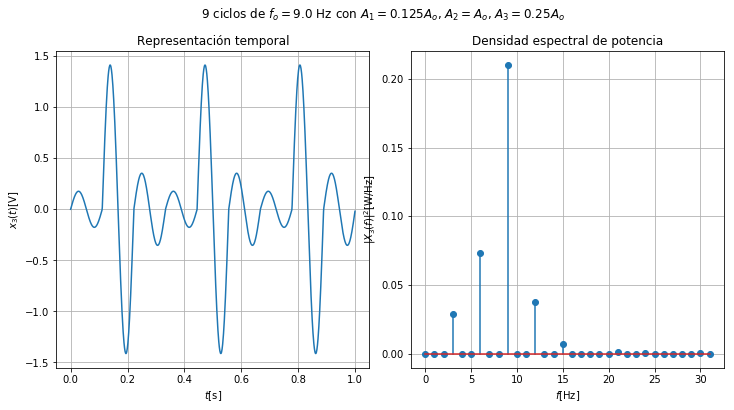

In [103]:
#################################################################
# Experimento para 3 ciclos de senoidal patrón de 9*(fs/N)      #
#################################################################

#Genero la señal en cuestión
A1 = 0.125
A2 = 1
A3 = 0.25

cond1 = (t < To1).reshape(N,1)
cond2 = ((t < 2*To1).reshape(N,1))*((t >= To1).reshape(N,1))
cond3 = ((t < 3*To1).reshape(N,1))*((t >= 2*To1).reshape(N,1))

cond4 = ((t < 4*To1).reshape(N,1))*((t >= 3*To1).reshape(N,1))
cond5 = ((t < 5*To1).reshape(N,1))*((t >= 4*To1).reshape(N,1))
cond6 = ((t < 6*To1).reshape(N,1))*((t >= 5*To1).reshape(N,1))

cond7 = ((t < 7*To1).reshape(N,1))*((t >= 6*To1).reshape(N,1))
cond8 = ((t < 8*To1).reshape(N,1))*((t >= 7*To1).reshape(N,1))
cond9 = ((t <= 9*To1).reshape(N,1))*((t >= 8*To1).reshape(N,1))

x3 = (A1*x1*cond1) + (A2*x1*cond2) + (A3*x1*cond3) + (A1*x1*cond4) + (A2*x1*cond5) + (A3*x1*cond6) + (A1*x1*cond7) + (A2*x1*cond8) + (A3*x1*cond9)

#Tabla en la que se almacenran los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$']]

#####################
# Predicción        #
#####################

tus_resultados.append(['','',''])
tus_resultados.append([str((3*np.power(A1,2)/9)+(3*np.power(A2,2)/9)+(3*np.power(A3,2)/9)),str(np.power(3*(A1/9) + 3*(A2/9) + 3*(A3/9),2)),str(fo1)])

#####################
# Simulación        #
#####################

(f,X3) = analizador.PSD(x3)

#Obtencion analítica de resultados
tus_resultados.append(['','',''])
tus_resultados.append([str(np.sum(X3)),str(X3[fn1]),str((fs/N)*np.argmax(X3))])

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('9 ciclos de $f_{o} = ' + str(fo1) + '$ Hz con $A_{1} = 0.125A_{o}$, $A_{2} = A_{o}$, $A_{3} = 0.25A_{o}$', fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t, x3)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x_{3}(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[0:int(N/32)],X3[0:int(N/32)])
axarr[1].set_title('Densidad espectral de potencia')
axarr[1].set_ylabel('$|X_{3}(f)|^2$[W/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

In [104]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.359375,0.210069444444,9.0
,,,
simulación,0.359375015703,[ 0.21006946],9.0


<div class="alert alert-block alert-warning">
<b>Respuesta:</b>

Se han verificado las hipótesis respecto a la $E_{total}$, el desparramo de la misma, la ubicación del máximo de energía $f_{o}$ y su valor $|X_{3}(f_{o})|$. En particular, se observa que es igual al caso anterior pero multiplicando por $3$ el aporte de cada ciclo de amplitud $A_{i}$ con $i = 1,2,3$ para obtener $|X_{3}(f_{o})|$ ya que la señal en cuestión es la del caso anterior pero repetida $3$ veces. Respecto al primer experimento, $|X_{3}(f_{o})|$ es el resultado de sumar $9$ ciclos de la senoidal patrón $\frac{1}{9}$, en este caso $|X_{3}(f_{o})|$ es el resultado de sumar nueve ciclos de la senoidal patrón $\frac{1}{9}$ pero cada uno ponderado por la amplitud que tiene la senoidal en ese ciclo.

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-success">
<b>Predicción:</b> 

Se predice un espectro de forma similar a una $sinc(x)$ de energía total $\frac{2}{9}$ centrada en $f_{o} = 9\Delta_{f} = 9 Hz$ pero con $|X_{3}(f_{o})|^2 = 0$, es decir sin energía en esa frecuencia.

La energía total de la señal se explica teniendo en cuenta que la FFT considera que $x_{3}(t)$ es periódica cada $NT_{s}$ segundos. A diferencia del caso anterior, el área cuadrática de la señal será $4.5$ veces menor ya que se tiene $2$ períodos en vez de $9$. Por otra parte, la energía será $2$ veces mayor que el caso de la senoidal que solo tenia un período. 

</div>

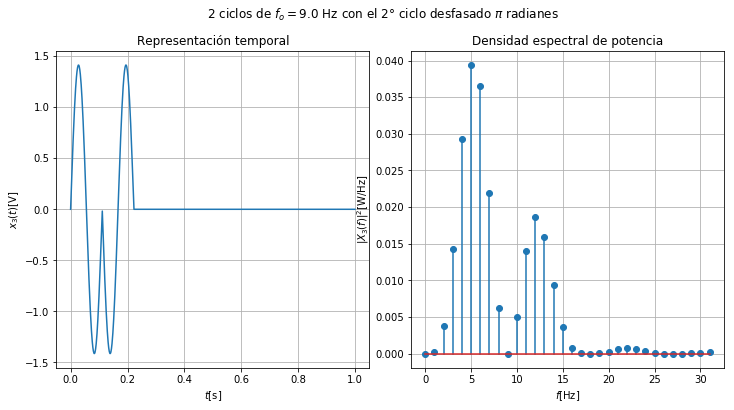

In [105]:
#################################################################
# Experimento para 3 ciclos de senoidal patrón de 9*(fs/N)      #
#################################################################

#Genero la señal en cuestión
cond1 = (t <= To1).reshape(N,1)
cond2 = ((t <= 2*To1).reshape(N,1))*((t > To1).reshape(N,1))

x3 = (x1*cond1) + (-x1*cond2)

#Tabla en la que se almacenran los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$']]

#####################
# Predicción        #
#####################

tus_resultados.append(['','',''])
tus_resultados.append([str(2/9),str(0),'$ \neq $' + str(fo1)])

#####################
# Simulación        #
#####################

(f,X3) = analizador.PSD(x3)

#Obtencion analítica de resultados
tus_resultados.append(['','',''])
tus_resultados.append([str(np.sum(X3)),str(X3[fn1]),str((fs/N)*np.argmax(X3))])

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('2 ciclos de $f_{o} = ' + str(fo1) + '$ Hz con el $2°$ ciclo desfasado $\pi$ radianes', fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t, x3)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x_{3}(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()
axarr[1].stem(f[0:int(N/32)],X3[0:int(N/32)])
axarr[1].set_title('Densidad espectral de potencia')
axarr[1].set_ylabel('$|X_{3}(f)|^2$[W/Hz]')
axarr[1].set_xlabel('$f$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

In [106]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.2222222222222222,0,$ \neq $9.0
,,,
simulación,0.222222249467,[ 2.83957134e-11],5.0


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Se han verificado las hipótesis respecto a la $E_{total}$, el desparramo de la misma, la ubicación del máximo de energía y el valor de $|X_{3}(f_{o})| = 0$. Esto último se explica como la sumatoria entre el espectro de una senoidal y el espectro de si misma desfasado $\pi                           $ radianes, por lo que las componentes en $f_{o} = 9 Hz$ se restaran dando un valor nulo.

</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [68]:
######################################
# Se importan los modulos necesarios #
######################################

#Importa el paquete numérico
import numpy as np

#Importa el paquete de manejo de datos pandas
import pandas as pd
from IPython.display import HTML

#Importa el paquete gráfico
import matplotlib.pyplot as plt

#Importa el paquete que implementa la clase generador de señales
import pdsmodulos.signal_generator as gen

#Importa el paquete que implementa la clase analizador de espectro
import pdsmodulos.spectrum_analyzer as sa

#Importa el paquete que implementa funciones estadisticas
import pdsmodulos.statistic as sta

#Importa el paquete que implementa la clase ADC
import pdsmodulos.adc as converter

In [69]:
#############################
# Parametros del generador  #
#############################

#Se busca una grilla temporal densa que simule un caso continuo
N_t = np.power(2,20)       # Muestras
fs_t = np.power(2,20)      # Hz

########################################
# Inicializo el generador de funciones #
########################################

generador = gen.signal_generator(fs_t,N_t)

In [70]:
##########################################
# Generacion de la señal deterministica  #
##########################################    

A0 = np.sqrt(2)
f0 = 1
p0 = 0

(t,s) = generador.sinewave(A0,f0,p0)

#Potencia de la señal
Ps = np.var(s)

#Energia normalizada de la señal(en un periodo)
Es = (Ps)/f0

In [71]:
##########################################
# Generacion del ruido analógico         #
##########################################    

#Se generara ruido con energia proporcional al de la señal
k = Es/200

#El mismo tendra distribución uniforme
dist = ("uniform",)

#Los limites inferiores son función de la energia de ruido
a1 = np.sqrt(k)*np.sqrt(3)
a2 = -a1

(t1,n) = generador.noise(dist,a1,a2)


Se generara ruido con distribucion uniforme: a1 = limite inferior a2 = limite superior


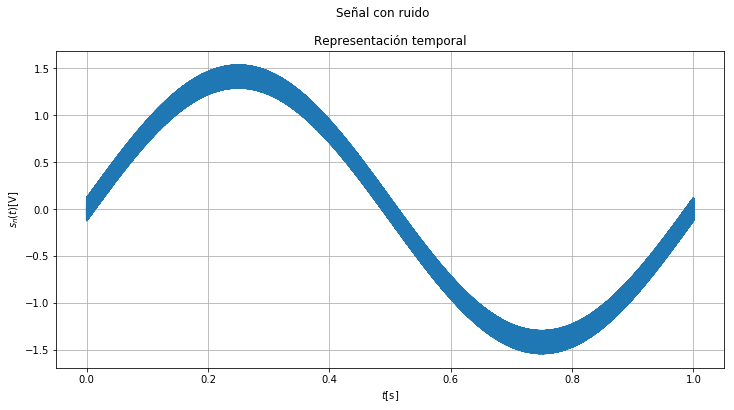

In [74]:
##########################################
# Generacion de la señal real            #
##########################################    

sn = s + n

#Representación gráfica de los resultados
fig, axarr = plt.subplots(1, 1,figsize = (10,5)) 
fig.suptitle('Señal con ruido', fontsize=12,y = 1.08)
fig.tight_layout()

axarr.plot(t1, sn)
axarr.set_title('Representación temporal')
axarr.set_ylabel('$s_{n}(t)$[V]')
axarr.set_xlabel('$t$[s]')
axarr.axis('tight')
axarr.grid()

In [79]:
#############################
# Parametros del ADC        #
#############################

n = (4,8,16) #Cantidad de bits para los que se hara la simulación 
Vref_high = 1 #Las Vref del ADC se han elegido para medir a plena escala 
Vref_low = -1 #una senoidal de energía normalizada
fs = np.power(2,10) #Frecuencia de muestreo, debe ser menor a la frecuencia de muestreo "continua"
N = np.power(2,10) #Cantidad de muestras

In [80]:
######################################################
# Inicializo el analizador de espectro               #
######################################################

SA = sa.spectrum_analyzer(fs,N)

In [81]:
##########################################
# Inicializacion del modulo estadistico  #
##########################################

STA = sta.statistic()

Toolbox Estadistico


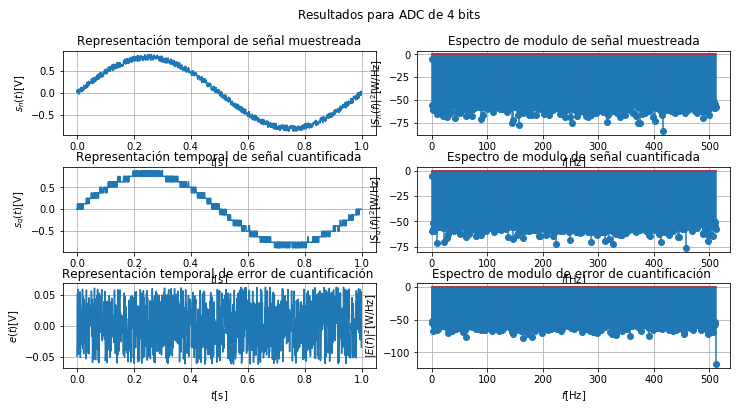

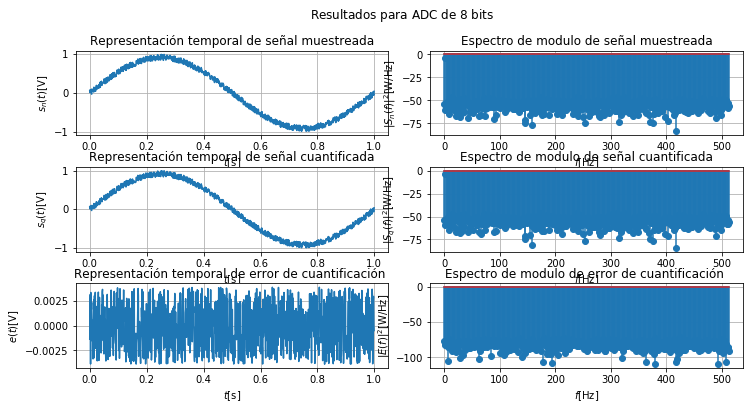

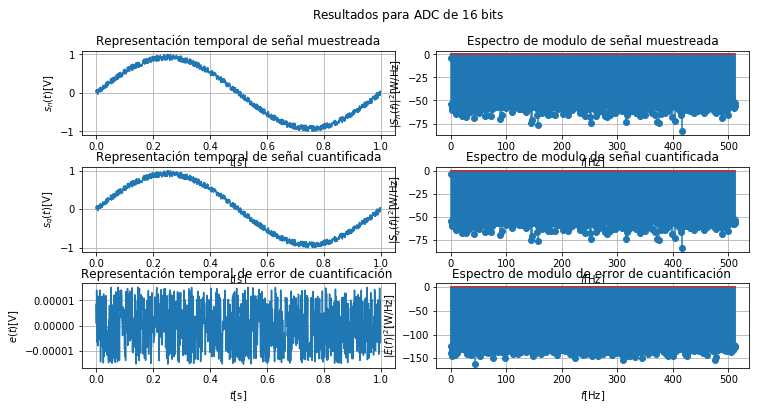

In [82]:
##########################################
# Simulacion del muestreo y cuantizacion #
##########################################

#Tabla en donde se almacenaran los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ]]

#En esta lista se almacenaran los resultados temporales de e para su posterior analisis

e = []

for ni in n:
    
    ########################################
    # Inicializo el ADC                    #
    ########################################

    ADC = converter.adc(fs,Vref_low,Vref_high,ni)
    
    ########################################
    # Simulo el muestreo con el ADC        #
    ########################################
        
    (t2,sni) = ADC.muestrear(t1,sn)
        
    ########################################
    # Simulo la cuantificación del ADC     #
    ########################################

    #Normalizo la señal muestreada para que entre en el rango dinamico y no se sature
    sni = (sni*(ADC.C_max*ADC.q))/(max(np.abs(sni)))

    #Cuantifico la señal muestreada
    (t2,sqi) = ADC.cuantizar(t2,sni)        

    #Se calcula el error de cuantificación
    ei = (sqi - sni)

    ##########################################
    # Cálculo del espectro de las señales    #
    ##########################################
    
    (f,SNi) = SA.PSD(sni)
    
    (f,SQi) = SA.PSD(sqi)
    
    (f,Ei) = SA.PSD(ei)
    
    ############################################
    # Cálculo de los resultados analiticos     #
    ############################################

    #Se cálcula la energía de la señal cuantificada
    Esqi = np.sum(SQi)

    #Se cálcula la energía de la señal real 
    Esni = np.sum(SNi)
    
    #Se cálcula la energía del error de cuantificación 
    Eei = np.sum(Ei)
    
    #Se adjuntan los resultados de esta vuelta a la tabla de resultado
    tus_resultados.append([str(Esni),str(Esqi),str(Eei)])
    
    #Se adjunta el error a la lista de errores
    e.append(ei)
    
    ############################################
    # Representación gráfica de resultados     #
    ############################################
        
    fig, axarr = plt.subplots(3, 2,figsize = (10,5)) 
    fig.suptitle('Resultados para ADC de $' + str(ni) + '$ bits', fontsize=12,y = 1.08)
    fig.tight_layout()
    
    axarr[0,0].plot(t2, sni)
    axarr[0,0].set_title('Representación temporal de señal muestreada')
    axarr[0,0].set_ylabel('$s_{n}(t)$[V]')
    axarr[0,0].set_xlabel('$t$[s]')
    axarr[0,0].axis('tight')
    axarr[0,0].grid()
    axarr[0,1].stem(f,10*np.log10(SNi))
    axarr[0,1].set_title('Espectro de modulo de señal muestreada')
    axarr[0,1].set_ylabel('$|S_{n}(f)|^2$[W/Hz]')
    axarr[0,1].set_xlabel('$f$[Hz]')
    axarr[0,1].axis('tight')
    axarr[0,1].grid()
    
    axarr[1,0].plot(t2, sqi)
    axarr[1,0].set_title('Representación temporal de señal cuantificada')
    axarr[1,0].set_ylabel('$s_{q}(t)$[V]')
    axarr[1,0].set_xlabel('$t$[s]')
    axarr[1,0].axis('tight')
    axarr[1,0].grid()
    axarr[1,1].stem(f,10*np.log10(SQi))
    axarr[1,1].set_title('Espectro de modulo de señal cuantificada')
    axarr[1,1].set_ylabel('$|S_{q}(f)|^2$[W/Hz]')
    axarr[1,1].set_xlabel('$f$[Hz]')
    axarr[1,1].axis('tight')
    axarr[1,1].grid()
    
    axarr[2,0].plot(t2, ei)
    axarr[2,0].set_title('Representación temporal de error de cuantificación ')
    axarr[2,0].set_ylabel('$e(t)$[V]')
    axarr[2,0].set_xlabel('$t$[s]')
    axarr[2,0].axis('tight')
    axarr[2,0].grid()
    axarr[2,1].stem(f,10*np.log10(Ei))
    axarr[2,1].set_title('Espectro de modulo de error de cuantificación ')
    axarr[2,1].set_ylabel('$|E(f)|^2$[W/Hz]')
    axarr[2,1].set_xlabel('$f$[Hz]')
    axarr[2,1].axis('tight')
    axarr[2,1].grid()


In [83]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,0.32631309409,0.327285766602,0.00134619917504
8 bits,0.419571420167,0.419462740421,5.28069197425e-06
16 bits,0.426178844504,0.426179715964,7.59664821714e-11


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

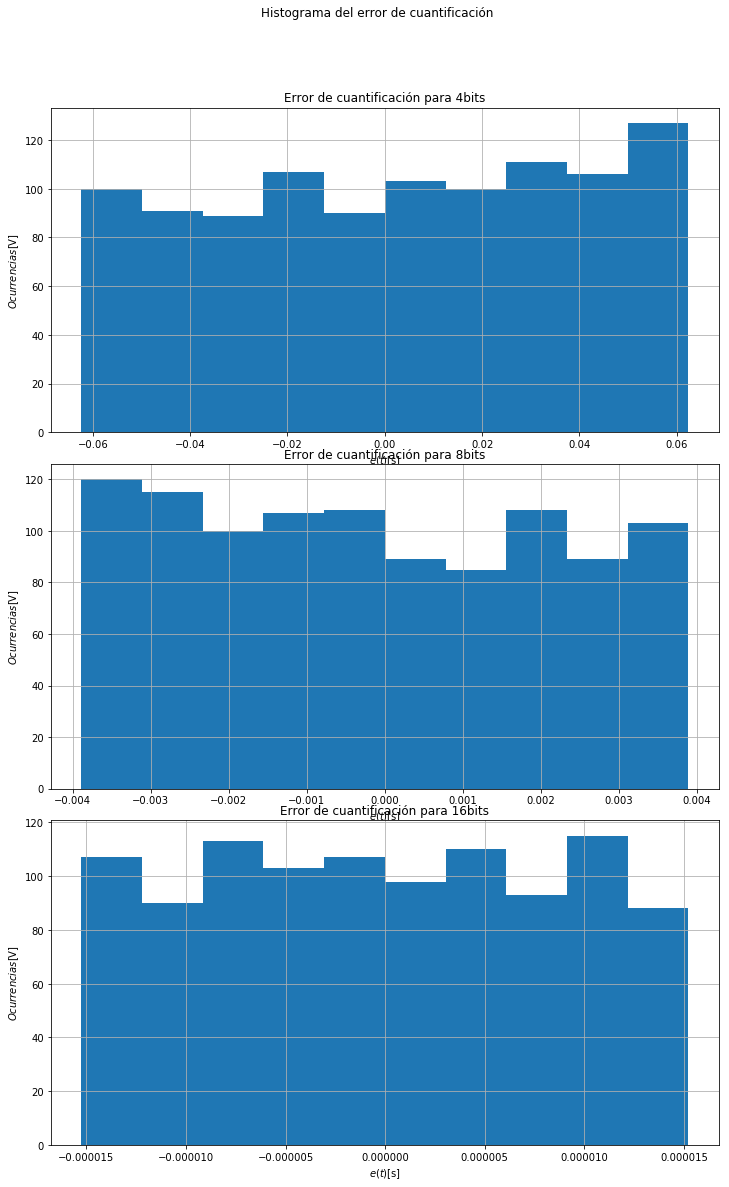

In [110]:
############################################
# Representación gráfica de resultados     #
############################################

tus_resultados1 = []
tus_resultados2 = []

############################################
# Representación gráfica de resultados     #
############################################
        
fig, axarr = plt.subplots(3,1,figsize = (10,15)) 
fig.suptitle('Histograma del error de cuantificación', fontsize=12,y = 1.08)
fig.tight_layout()
    
i = 0
    
for ei in e:

    Ni = np.size(ei,0)

    axarr[i].hist(ei)
    axarr[i].set_title('Error de cuantificación para ' + str(np.power(2,2)*np.power(2,i)) + 'bits')
    axarr[i].set_ylabel('$Ocurrencias$[V]')
    axarr[i].set_xlabel('$e(t)$[s]')
    axarr[i].axis('tight')
    axarr[i].grid()
    
    i = i + 1
    
    ei_med = 0
    ei_energy = 0
    
    for ei_t in ei:
        ei_med = ei_med + ei_t
        ei_energy = ei_energy + np.power(ei_t,2)
        
    ei_med = ei_med/N
    ei_energy = ei_energy/N
    ei_rms = np.sqrt(ei_energy)

    tus_resultados1.append([ei_med,str(ei_rms),str(ei_energy)])
    
    tus_resultados2.append([str(np.mean(ei)),str(np.std(ei)),str(np.var(ei))])

¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

Se obtiene una realización empírica de la distribución estadística del error de cuantificación. Podemos verificar que la misma es aproximadamente uniforme entre $\pm \frac{q}{2}$.

</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [18]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados1, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,[0.000298527864639],[ 0.03544336],[ 0.00125623]
8 bits,[-6.99330583319e-06],[ 0.0022056],[ 4.86466992e-06]
16 bits,[1.36315536811e-07],[ 8.65318843e-06],[ 7.48776701e-11]


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [19]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = pd.DataFrame(tus_resultados2, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,0.000298527864639,0.0354421010129,0.00125614252421
8 bits,-6.99330583319e-06,0.00220558858717,4.86462101587e-06
16 bits,1.36315536811e-07,8.65211466357e-06,7.48590881516e-11


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

La varianza $\sigma ^2$ y la desviación estándar $\sigma$ son iguales a la energía y al valor RMS. Esto solo es válido si el valor medio de la señal $\mu$ es igual a $0$. 

</div>